In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import random
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


DISTRIBUTION OF DATA

Text(17.31944444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

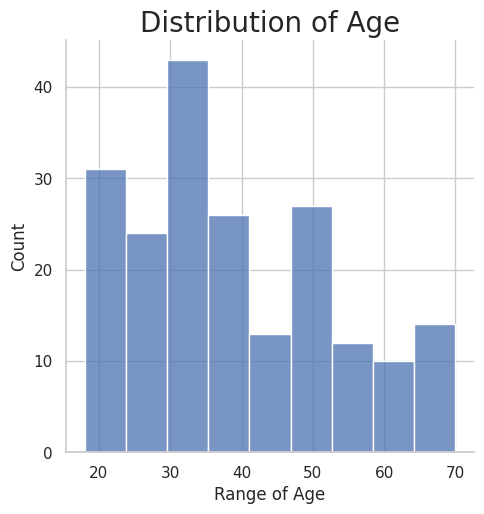

In [9]:
# DISTRIBUTION OF AGE

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

In [10]:
# plt.figure(figsize =(10 ,6))
# sns.set(style ='whitegrid')
# sns.displot(df['Genre'])

Text(17.31944444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

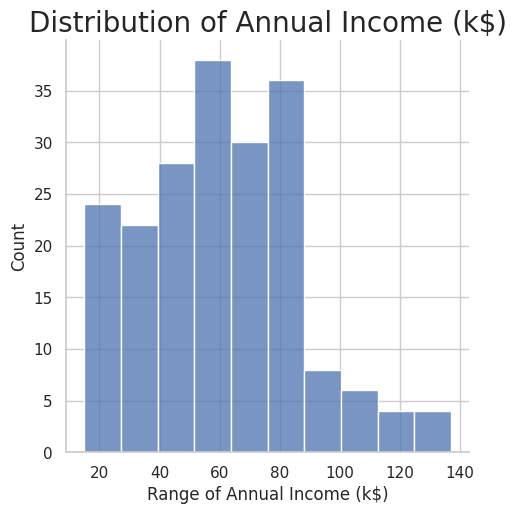

In [11]:
#Distribution of Annnual Income

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(17.31944444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

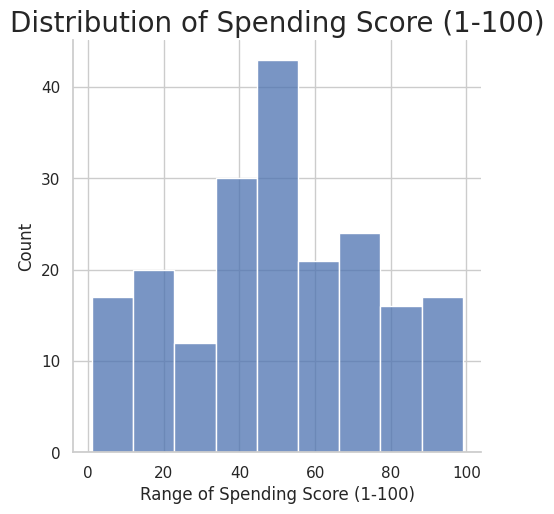

In [12]:
#Distribution of spending score

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

<Figure size 1000x600 with 0 Axes>

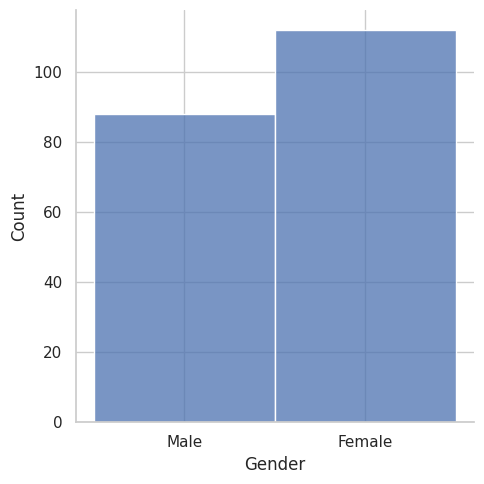

In [13]:
#Distribution of spending score

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Gender'])
# plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
# plt.xlabel('Range of Spending Score (1-100)')
# plt.ylabel('Count')

In [14]:
# df.rename(columns={'genre': 'gender'})

In [15]:
# Genres = df.Genre.value_counts()
# sns.barplot(x =Genre.index , y =Genres.value)
# plt.show()

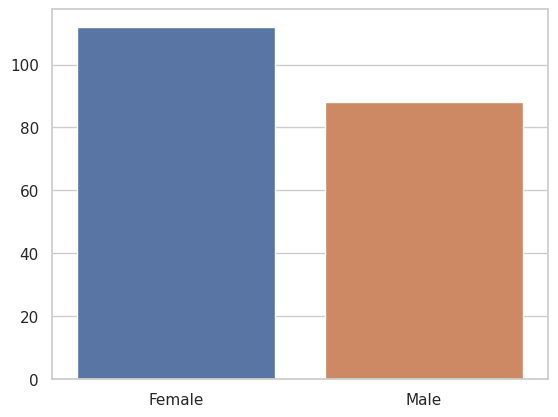

In [16]:
genders = df.Gender.value_counts()
# sns.set_style("darkgrid")
# plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

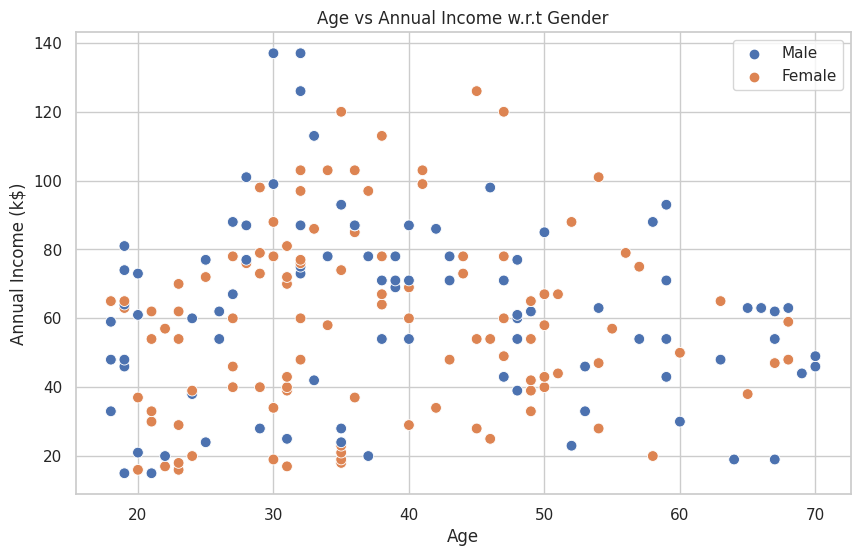

In [17]:
plt.figure(figsize =(10,6))
sns.scatterplot(x ='Age', y = 'Annual Income (k$)' ,hue="Gender", data = df , s= 60)\

plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

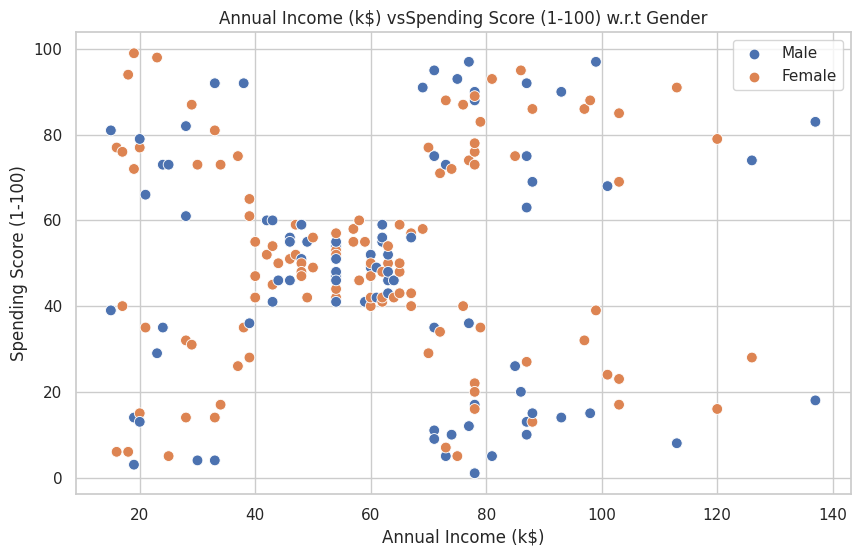

In [18]:
plt.figure(figsize =(10,6))
sns.scatterplot(x ='Annual Income (k$)', y = 'Spending Score (1-100)' ,hue="Gender", data = df , s= 60)

plt.title('Annual Income (k$) vsSpending Score (1-100) w.r.t Gender')
plt.legend()
plt.show()

AGE BUCKETS

In [19]:
Age18_25 = df.Age[(df.Age <=25) & (df.Age >= 18)]
Age26_35 = df.Age[(df.Age <=35) & (df.Age >= 26)]
Age36_45 = df.Age[(df.Age <=45) & (df.Age >= 36)]
Age46_55 = df.Age[(df.Age <=55) & (df.Age >= 46)]
Age55above = df.Age[(df.Age >= 56)]

x = ["18-25", "26-35" ,"36-45", "46-55" ,"55+"]
y = [len(Age18_25.values),len(Age26_35.values),len(Age36_45.values),len(Age46_55.values),len(Age55above.values)]


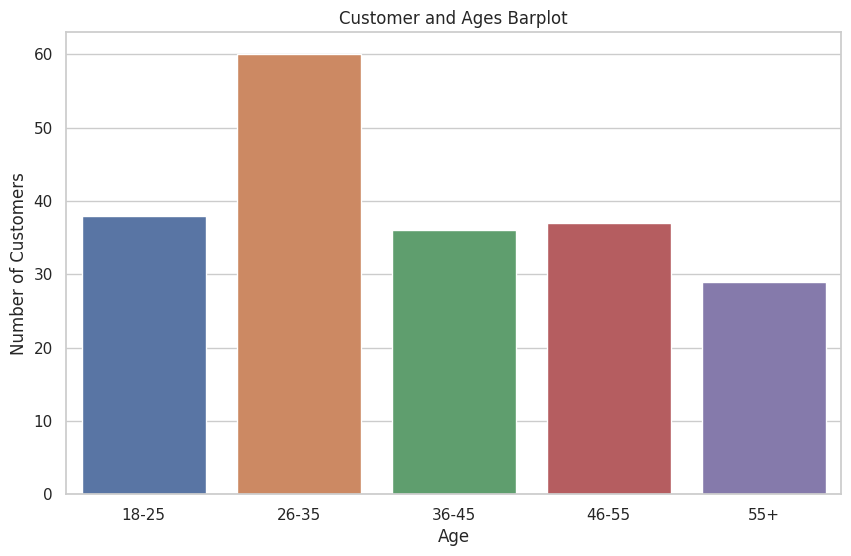

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

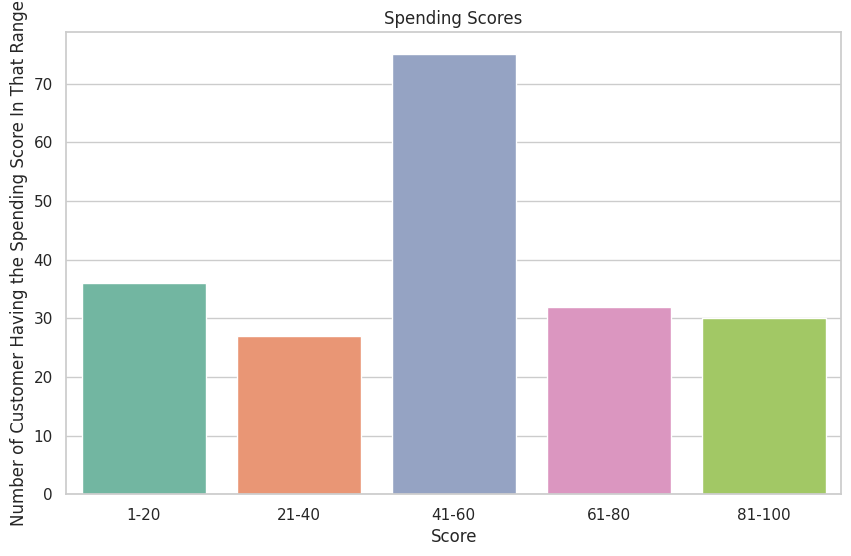

In [21]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="Set2")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Spending Score In That Range")
plt.show()

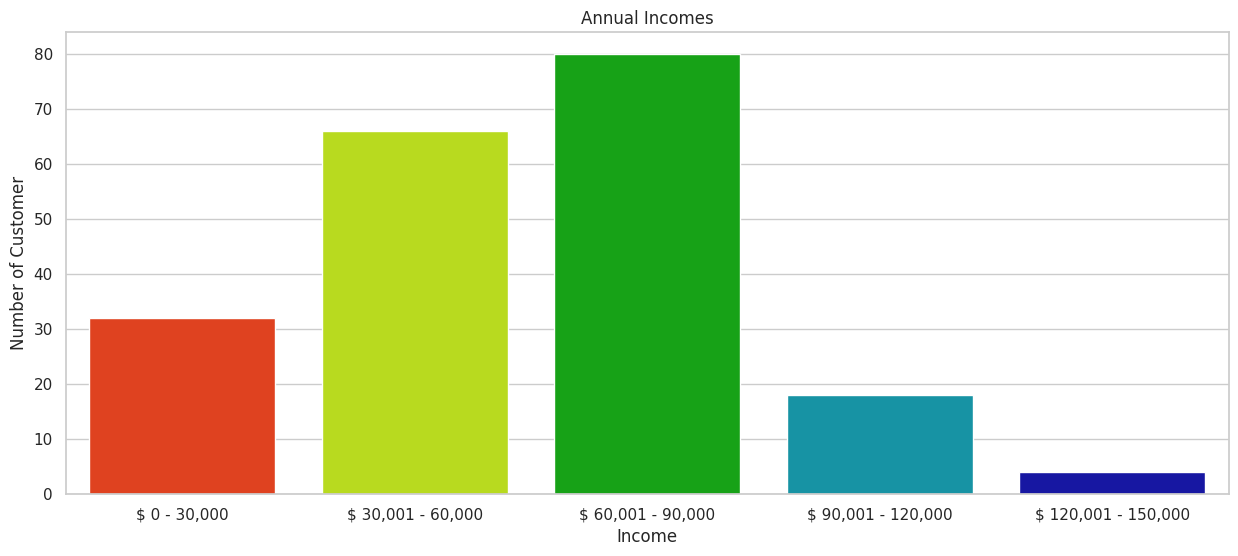

In [22]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

income_x = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
income_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

CLUSTERING BASED ON ANNUAL INCOME AND SPENDING SCORE

In [23]:
X = df[["Annual Income (k$)" , "Spending Score (1-100)"]]

In [24]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


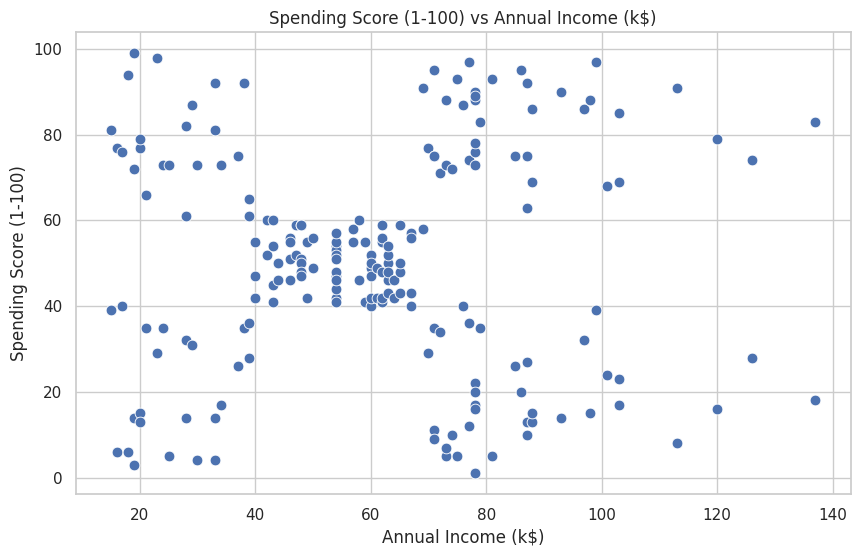

In [25]:
#Scatterplot of the input data

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

KMEANS CLUSTERING

In [26]:
from sklearn.cluster import KMeans

In [27]:
# clusterNum = 3
# k_means = KMeans(init = 'k-means++', n_clusters=clusterNum , n_init = 12)

In [28]:
# k_means.fit(X)

In [29]:
# labels = k_means.labels_

In [30]:
# labels

In [31]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

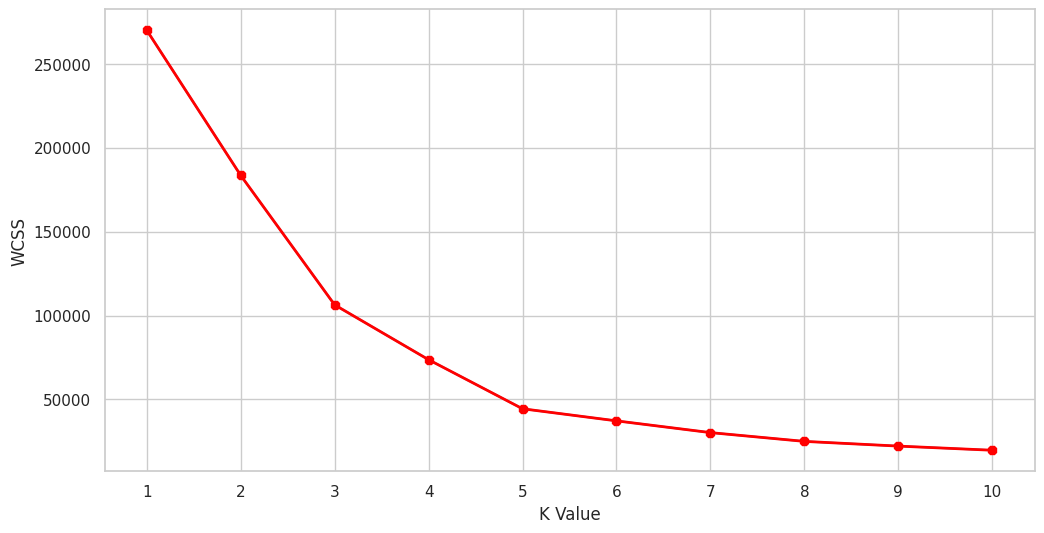

In [32]:
#The elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss)

plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")

plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

plt.show()

In [33]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have your data stored in a numpy array called 'data'
# You can replace this with your own dataset

# Define the range of cluster numbers to consider
min_clusters = 1
max_clusters = 10

# Initialize an empty list to store the WSS values for different cluster numbers
wss_values = []

# Loop over different numbers of clusters
for num_clusters in range(min_clusters, max_clusters + 1):
    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters)

    # Fit the KMeans model to the data
    kmeans.fit(X)

    # Calculate the WSS value (inertia_) for the fitted model
    wss = kmeans.inertia_

    # Append the WSS value to the list
    wss_values.append(wss)

# Print the WSS values for different cluster numbers
for num_clusters, wss in zip(range(min_clusters, max_clusters + 1), wss_values):
    print(f"Number of clusters: {num_clusters}, WSS: {wss}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 1, WSS: 269981.28
Number of clusters: 2, WSS: 181363.59595959593
Number of clusters: 3, WSS: 106348.37306211122
Number of clusters: 4, WSS: 73679.78903948836
Number of clusters: 5, WSS: 44448.4554479337
Number of clusters: 6, WSS: 37233.814510710006
Number of clusters: 7, WSS: 30241.34361793658
Number of clusters: 8, WSS: 25029.213398157226
Number of clusters: 9, WSS: 21809.92756261518
Number of clusters: 10, WSS: 19657.78360870395


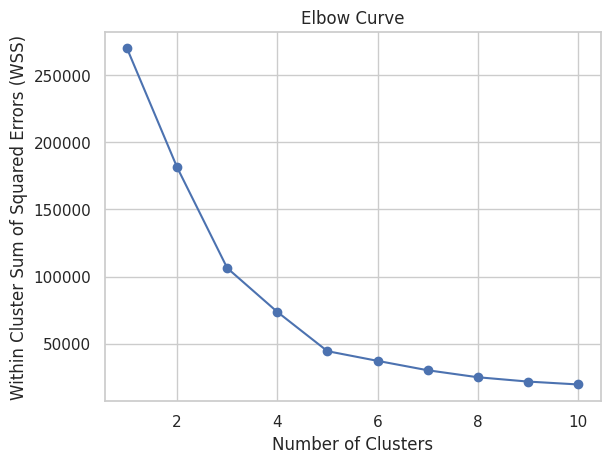

In [34]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the WSS values in the 'wss_values' list

# Plotting the elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squared Errors (WSS)')
plt.title('Elbow Curve')
plt.show()

In [35]:
#Taking 5 clusters
km1 = KMeans(n_clusters = 5)
km1.fit(X)
y = km1.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
df["label"] =y

In [37]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [38]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


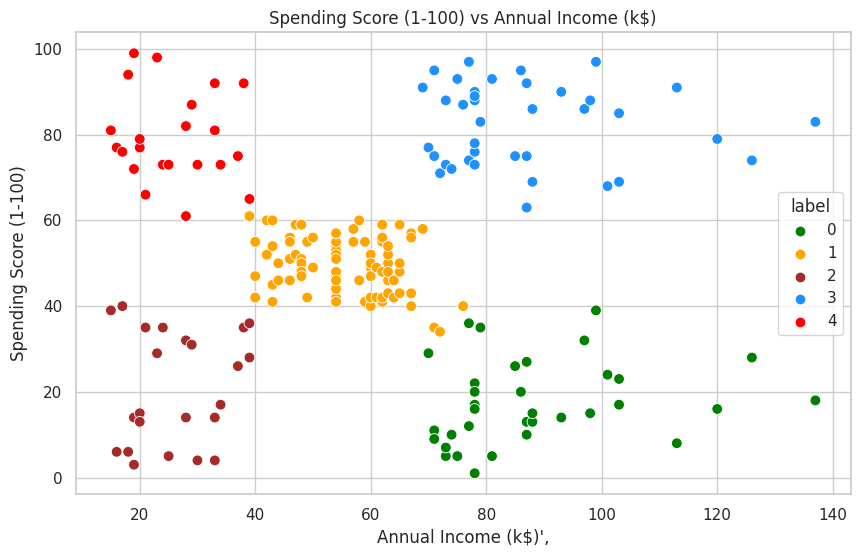

In [40]:
plt.figure(figsize = (10,6))
sns.scatterplot( x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue ="label", palette =['green','orange','brown','dodgerblue','red'], legend ="full", data = df ,s =60)

plt.xlabel("Annual Income (k$)',")
plt.ylabel("Spending Score (1-100)")
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

NOW PRINTING THE CUSTOMER ID ACCORDING TO THE GROUPS

In [42]:
cust1 = df[df["label"] ==1]
print("number of customer in 1st group=", len(cust1))
print("they are ", cust1["CustomerID"].values)



number of customer in 1st group= 81
they are  [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]


In [43]:
cust2 = df[df["label"] ==2]
print("number of customer in 2nd group=", len(cust2))
print("they are ", cust2["CustomerID"].values)

number of customer in 1st group= 23
they are  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


In [44]:
cust3 = df[df["label"] ==3]
print("number of customer in 3rd group=", len(cust3))
print("they are ", cust3["CustomerID"].values)

number of customer in 1st group= 39
they are  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


In [45]:
cust4 = df[df["label"] == 4]
print("number of customer in 4th group=", len(cust4))
print("they are ", cust4["CustomerID"].values)

number of customer in 4th group= 22
they are  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]


In [47]:
cust5 = df[df["label"] ==0]
print("number of customer in 5th group=", len(cust5))
print("they are ", cust5["CustomerID"].values)

number of customer in 5th group= 35
they are  [125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]


CLUSTERING ON THE BASIS OF 3D DATA

In [49]:
df2 = df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
X2 = df2[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [51]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have your data stored in a numpy array called 'data'
# You can replace this with your own dataset

# Define the range of cluster numbers to consider
min_clusters = 1
max_clusters = 10

# Initialize an empty list to store the WSS values for different cluster numbers
wss_values = []

# Loop over different numbers of clusters
for num_clusters in range(min_clusters, max_clusters + 1):
    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters)

    # Fit the KMeans model to the data
    kmeans.fit(X2)

    # Calculate the WSS value (inertia_) for the fitted model
    wss = kmeans.inertia_

    # Append the WSS value to the list
    wss_values.append(wss)

# Print the WSS values for different cluster numbers
for num_clusters, wss in zip(range(min_clusters, max_clusters + 1), wss_values):
    print(f"Number of clusters: {num_clusters}, WSS: {wss}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Number of clusters: 1, WSS: 308812.78
Number of clusters: 2, WSS: 212840.1698209719
Number of clusters: 3, WSS: 143342.751571706
Number of clusters: 4, WSS: 104366.15145556197
Number of clusters: 5, WSS: 75350.77917248776
Number of clusters: 6, WSS: 58300.44332159069
Number of clusters: 7, WSS: 51118.839039127066
Number of clusters: 8, WSS: 44342.3173934174
Number of clusters: 9, WSS: 40602.40694083694
Number of clusters: 10, WSS: 37139.12507904612


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


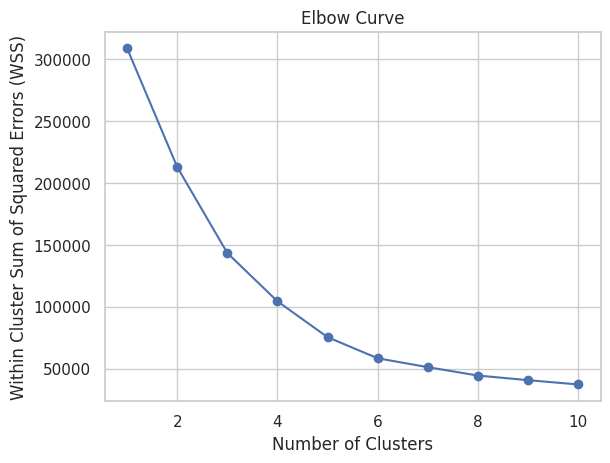

In [53]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the WSS values in the 'wss_values' list

# Plotting the elbow curve
plt.plot(range(min_clusters, max_clusters + 1), wss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squared Errors (WSS)')
plt.title('Elbow Curve')
plt.show()

In [55]:
#We choose the k for which WSS starts to diminish

km2 = KMeans(n_clusters = 5)
y2 = km2.fit(X2)
y2 = km2.predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
df2["label"] = y2

In [57]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


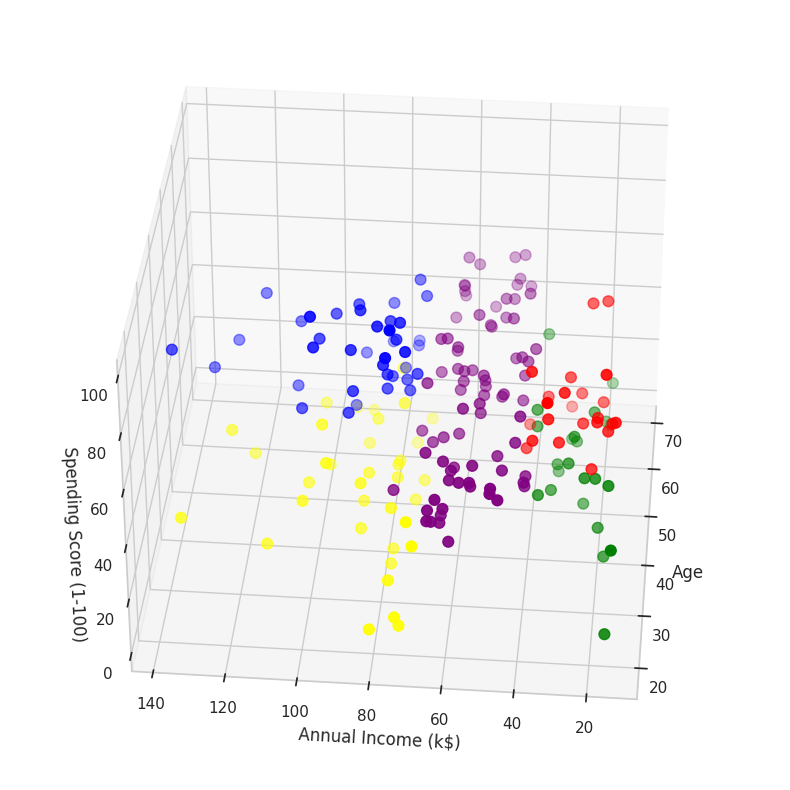

In [59]:
#3D Plot as we did the clustering on the basis of 3 input features

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.label == 0], df2["Annual Income (k$)"][df2.label == 0], df2["Spending Score (1-100)"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.Age[df2.label == 1], df2["Annual Income (k$)"][df2.label == 1], df2["Spending Score (1-100)"][df2.label == 1], c='red', s=60)
ax.scatter(df2.Age[df2.label == 2], df2["Annual Income (k$)"][df2.label == 2], df2["Spending Score (1-100)"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.Age[df2.label == 3], df2["Annual Income (k$)"][df2.label == 3], df2["Spending Score (1-100)"][df2.label == 3], c='green', s=60)
ax.scatter(df2.Age[df2.label == 4], df2["Annual Income (k$)"][df2.label == 4], df2["Spending Score (1-100)"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [58]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)

Number of customer in 1st group= 23
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]


In [60]:
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)

Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]


In [61]:
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)

Number of customer in 3rd group= 79
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]


In [62]:
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)

Number of customer in 4th group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]


In [63]:
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)

Number of customer in 5th group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
